In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from pandas_ml import ConfusionMatrix
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV

In [2]:
dataframe = pd.read_csv("pima-indians-diabetes.csv",header=None)
array = dataframe.values
## separate array into input and output components
X = array[:,0:8]
y = array[:,8]


In [4]:
from sklearn.svm import SVC
model = SVC(kernel = 'rbf', random_state = 0)
model.fit(X,y)
yhat = model.predict(X)
print ("Training Accuracy")
print (metrics.accuracy_score(y, yhat))
print (metrics.classification_report(y, yhat))
print (ConfusionMatrix(y, yhat))

Training Accuracy
1.0
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00       500
        1.0       1.00      1.00      1.00       268

avg / total       1.00      1.00      1.00       768

Predicted  0.0  1.0  __all__
Actual                      
0.0        500    0      500
1.0          0  268      268
__all__    500  268      768


In [5]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
model1 = SVC(kernel = 'rbf', random_state = 0)
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
print(ConfusionMatrix(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

Predicted  0.0  1.0  __all__
Actual                      
0.0        151    0      151
1.0         80    0       80
__all__    231    0      231
0.65367965368


C:\Users\hshah\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
gammas = np.logspace(-5, -4, 2)
Cs = np.logspace(-2, 4, 4)
kernels=('linear','rbf','poly')
parameters={'kernel':kernels,'gamma':gammas,"C":Cs}

Compare=svm.SVC() 
Best=GridSearchCV(Compare,parameters,return_train_score=True,n_jobs=-1)
Best.fit(X_train,y_train)
print("Best Parmeters are", Best.best_params_," Testing Accuracy is ", Best.best_estimator_.score(X_test,y_test))



Best Parmeters are {'C': 10000.0, 'gamma': 1.0000000000000001e-05, 'kernel': 'linear'}  Testing Accuracy is  0.705627705628


In [15]:
best_model=Best.best_estimator_
yhat = best_model.predict(X_test)
print(metrics.accuracy_score(y_test,yhat))
print(ConfusionMatrix(y_test, yhat))

0.705627705628
Predicted  0.0  1.0  __all__
Actual                      
0.0        116   35      151
1.0         33   47       80
__all__    149   82      231


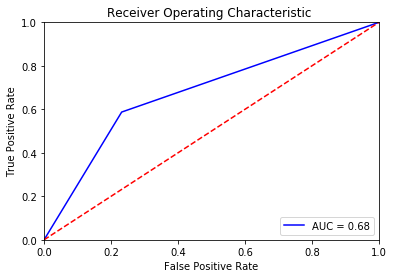

In [16]:
fpr, tpr, threshold = metrics.roc_curve(y_test, yhat)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic ')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()